<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_8_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.917356,34.068388,67.900907,10.115171,205.001823,194.292742,10.709081
1,0.0,1.0,64.043434,67.089070,38.899903,16.621477,196.653883,178.668879,17.985004
2,0.0,2.0,30.698935,58.881232,50.122107,-41.916992,107.785282,148.202763,-40.417481
3,0.0,3.0,39.954980,89.876534,20.144878,-12.593754,147.382638,157.985461,-10.602823
4,0.0,4.0,20.703151,50.034116,96.374000,-7.623760,169.487507,175.244639,-5.757132
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.218754,37.306294,60.268222,-35.399561,155.393709,191.851089,-36.457380
249996,999.0,246.0,63.201257,86.482982,93.381612,-38.350550,214.715300,255.163398,-40.448097
249997,999.0,247.0,73.442053,31.547563,57.163211,16.213610,188.366436,172.085246,16.281190
249998,999.0,248.0,70.824147,50.265501,22.425191,3.544334,157.059172,154.878982,2.180190


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.917356,34.068388,67.900907,10.115171,205.001823,194.292742,10.709081
1,0.0,1.0,64.043434,67.089070,38.899903,16.621477,196.653883,178.668879,17.985004
2,0.0,2.0,30.698935,58.881232,50.122107,-41.916992,107.785282,148.202763,-40.417481
3,0.0,3.0,39.954980,89.876534,20.144878,-12.593754,147.382638,157.985461,-10.602823
4,0.0,4.0,20.703151,50.034116,96.374000,-7.623760,169.487507,175.244639,-5.757132
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.218754,37.306294,60.268222,-35.399561,155.393709,191.851089,-36.457380
249996,999.0,246.0,63.201257,86.482982,93.381612,-38.350550,214.715300,255.163398,-40.448097
249997,999.0,247.0,73.442053,31.547563,57.163211,16.213610,188.366436,172.085246,16.281190
249998,999.0,248.0,70.824147,50.265501,22.425191,3.544334,157.059172,154.878982,2.180190


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    82.917356  34.068388  67.900907  ...  205.001823  194.292742  10.709081
      1.0    64.043434  67.089070  38.899903  ...  196.653883  178.668879  17.985004
      2.0    30.698935  58.881232  50.122107  ...  107.785282  148.202763 -40.417481
      3.0    39.954980  89.876534  20.144878  ...  147.382638  157.985461 -10.602823
      4.0    20.703151  50.034116  96.374000  ...  169.487507  175.244639  -5.757132
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  83.218754  37.306294  60.268222  ...  155.393709  191.851089 -36.457380
      246.0  63.201257  86.482982  93.381612  ...  214.715300  255.163398 -40.448097
      247.0  73.442053  31.547563  57.163211  ...  188.366436  172.085246  16.281190
      248.0  70.824147  50.265501  22.425191  ...  157.059172  154.878982   2.180190
      249.0  71.077429  38.798128  81.072405  ...  227.241062  200.830146  26.410916

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    82.917356  34.068388  67.900907  ...  205.001823  194.292742  10.709081
      1.0    64.043434  67.089070  38.899903  ...  196.653883  178.668879  17.985004
      2.0    30.698935  58.881232  50.122107  ...  107.785282  148.202763 -40.417481
      3.0    39.954980  89.876534  20.144878  ...  147.382638  157.985461 -10.602823
      4.0    20.703151  50.034116  96.374000  ...  169.487507  175.244639  -5.757132
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  83.218754  37.306294  60.268222  ...  155.393709  191.851089 -36.457380
      246.0  63.201257  86.482982  93.381612  ...  214.715300  255.163398 -40.448097
      247.0  73.442053  31.547563  57.163211  ...  188.366436  172.085246  16.281190
      248.0  70.824147  50.265501  22.425191  ...  157.059172  154.878982   2.180190
      249.0  71.077429  38.798128  81.072405  ...  227.241062  200.830146  26.410916

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.917356,34.068388,67.900907,10.115171,205.001823,194.292742,10.709081
1,0.0,1.0,64.043434,67.089070,38.899903,16.621477,196.653883,178.668879,17.985004
2,0.0,2.0,30.698935,58.881232,50.122107,-41.916992,107.785282,148.202763,-40.417481
3,0.0,3.0,39.954980,89.876534,20.144878,-12.593754,147.382638,157.985461,-10.602823
4,0.0,4.0,20.703151,50.034116,96.374000,-7.623760,169.487507,175.244639,-5.757132
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.218754,37.306294,60.268222,-35.399561,155.393709,191.851089,-36.457380
249996,999.0,246.0,63.201257,86.482982,93.381612,-38.350550,214.715300,255.163398,-40.448097
249997,999.0,247.0,73.442053,31.547563,57.163211,16.213610,188.366436,172.085246,16.281190
249998,999.0,248.0,70.824147,50.265501,22.425191,3.544334,157.059172,154.878982,2.180190


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    82.917356  34.068388  67.900907  ...  205.001823  194.292742  10.709081
      1.0    64.043434  67.089070  38.899903  ...  196.653883  178.668879  17.985004
      2.0    30.698935  58.881232  50.122107  ...  107.785282  148.202763 -40.417481
      3.0    39.954980  89.876534  20.144878  ...  147.382638  157.985461 -10.602823
      4.0    20.703151  50.034116  96.374000  ...  169.487507  175.244639  -5.757132
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  83.218754  37.306294  60.268222  ...  155.393709  191.851089 -36.457380
      246.0  63.201257  86.482982  93.381612  ...  214.715300  255.163398 -40.448097
      247.0  73.442053  31.547563  57.163211  ...  188.366436  172.085246  16.281190
      248.0  70.824147  50.265501  22.425191  ...  157.059172  154.878982   2.180190
      249.0  71.077429  38.798128  81.072405  ...  227.241062  200.830146  26.410916

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

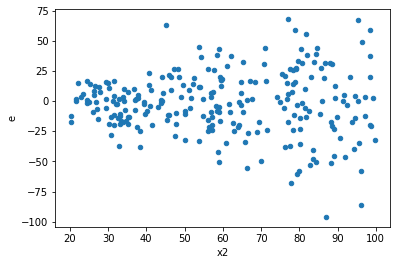

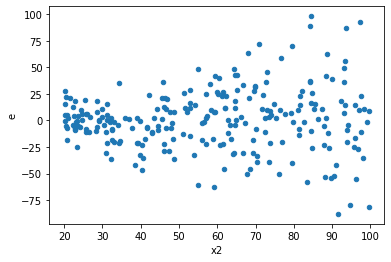

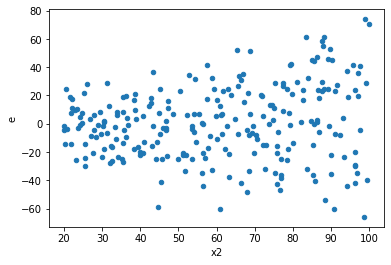

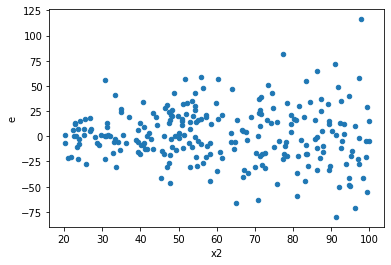

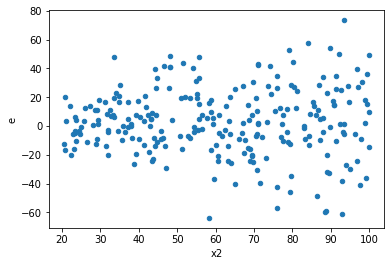

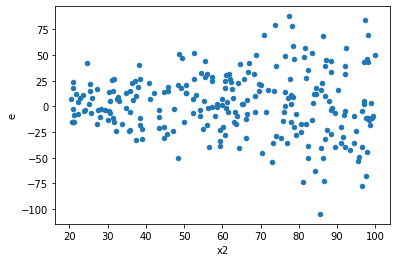

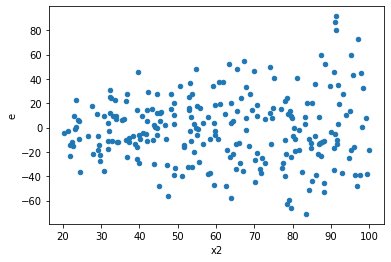

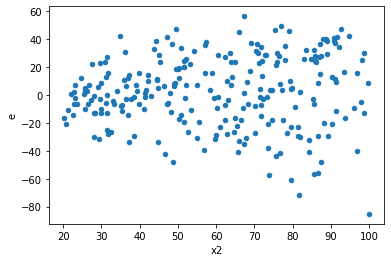

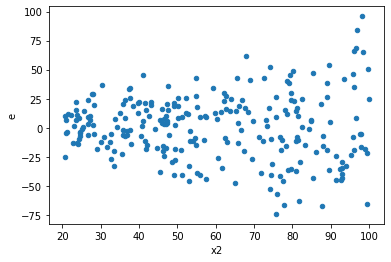

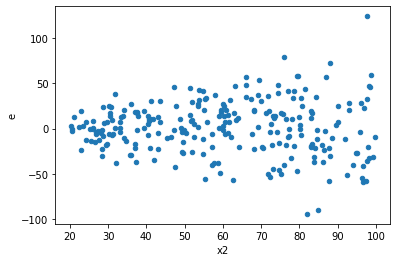

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,112663.41538348305,21605.474798347772,1173.5772435779484,225.05702914945596,5.214577158568102,1.2434497875801753e-14,0.9999999999999938,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,141022.23316808682,24231.46774307339,1468.9815955009044,252.41112232368116,5.819797408202741,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,97680.12052179391,30003.21177199938,1017.5012554353533,312.5334559583269,3.255655469957196,1.6813655356884283e-08,0.9999999915931723,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,110909.10412213847,34387.928617933365,1155.3031679389424,358.20758977013924,3.2252336380708653,2.151508282643988e-08,0.9999999892424586,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,80191.98526398154,28700.161863950972,835.333179833141,298.96001941615594,2.7941300695139004,7.719242502979284e-07,0.9999996140378749,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,154799.10235481622,38340.187482897396,1612.4906495293355,399.3769529468479,4.037515529204657,3.9922509742496004e-11,0.9999999999800387,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,113047.24724688768,38887.32125529521,1177.57549215508,405.0762630759918,2.907046399640969,2.9776977661377657e-07,0.9999998511151117,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,92330.97328133408,32572.70637195024,961.7809716805633,339.299024707815,2.8346116600505833,5.479899023441703e-07,0.9999997260050488,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,131042.22563485005,29213.645952223946,1365.0231836963546,304.3088120023328,4.485651186748712,1.6084911180769268e-12,0.9999999999991958,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,112663.41538348305,21605.474798347772,1173.5772435779484,225.05702914945596,5.214577158568102,1.2434497875801753e-14,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,141022.23316808682,24231.46774307339,1468.9815955009044,252.41112232368116,5.819797408202741,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,97680.12052179391,30003.21177199938,1017.5012554353533,312.5334559583269,3.255655469957196,1.6813655356884283e-08,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,110909.10412213847,34387.928617933365,1155.3031679389424,358.20758977013924,3.2252336380708653,2.151508282643988e-08,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,80191.98526398154,28700.161863950972,835.333179833141,298.96001941615594,2.7941300695139004,7.719242502979284e-07,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,154799.10235481622,38340.187482897396,1612.4906495293355,399.3769529468479,4.037515529204657,3.9922509742496004e-11,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,113047.24724688768,38887.32125529521,1177.57549215508,405.0762630759918,2.907046399640969,2.9776977661377657e-07,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,92330.97328133408,32572.70637195024,961.7809716805633,339.299024707815,2.8346116600505833,5.479899023441703e-07,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,131042.22563485005,29213.645952223946,1365.0231836963546,304.3088120023328,4.485651186748712,1.6084911180769268e-12,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64